In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [51]:
#Buildin a model for a company's retention system
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [52]:
#checking the decription of the data
df.info()
#so there are no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [53]:
df.describe()
#summary of nummerical data.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


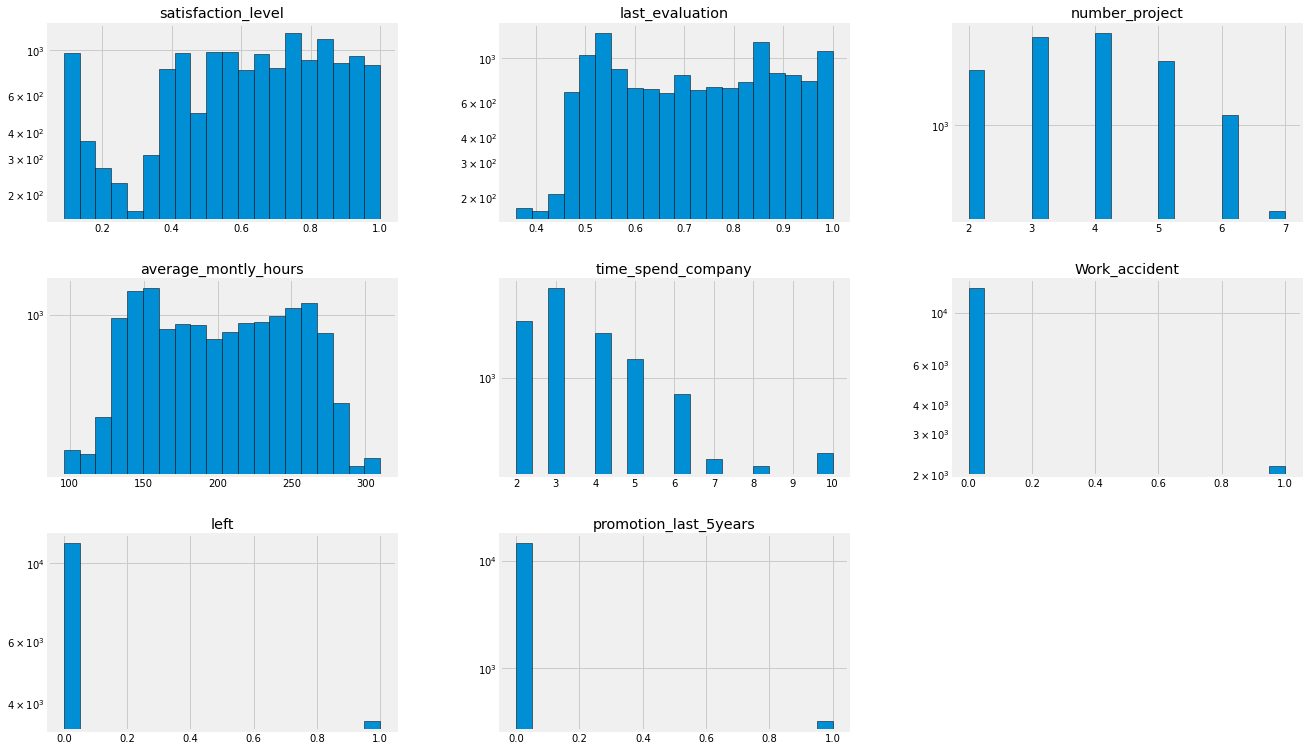

In [54]:
%matplotlib inline
df.hist(bins = 20, edgecolor = 'black', log = True, figsize = (20,13))
plt.show()
#having a full visual of the dataframe

In [55]:
df1 = df.copy()

In [56]:
#creating a left and retention variable
left =df1[df1['left']==1]
retained = df1[df1['left']==0]

In [57]:
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [58]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [59]:
#plotting a bar chart to evaluate the left vs salary 
x_axis = np.arange(len(left['salary']))

<AxesSubplot:xlabel='salary', ylabel='count'>

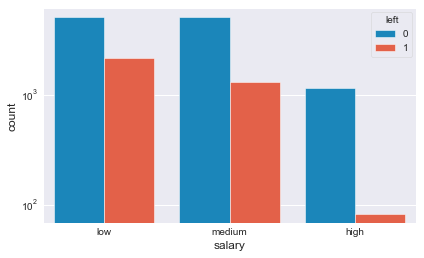

In [66]:
sns.set_style('darkgrid')
sns.countplot(x = df['salary'], hue = df['left'], log = True)
#From this simple visualisation we can see people with low salary range tend to have the highest retained and left numbers

<AxesSubplot:xlabel='count', ylabel='Department'>

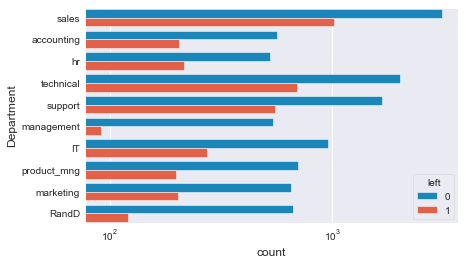

In [69]:
#plotting a bar plot of left to department
sns.set_style('darkgrid')
sns.countplot(y = df.Department, hue = df.left, log = True)
#we can dedude here that management has the lowest ratio of people who stay or leave,than sales with the highest people staying

In [108]:
#Average monthly hours to left
sl = df.average_montly_hours
np = df.number_project
tsc = df.time_spend_company
hmh = 150
mmh = 200

Text(0, 0.5, 'employees')

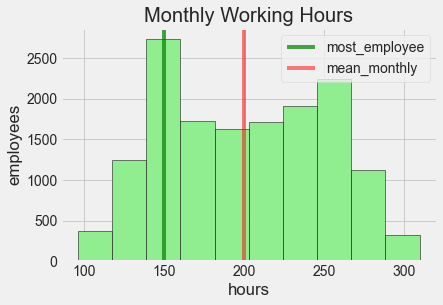

In [115]:
plt.style.use('fivethirtyeight')
plt.hist(sl, bins = 10 ,color = 'lightgreen',edgecolor = 'black')
plt.axvline(hmh, color = 'green', label = 'most_employee', alpha = 0.7)
plt.axvline(mmh, color = 'red', label = 'mean_monthly', alpha = 0.5)
plt.legend()
plt.title('Monthly Working Hours')
plt.xlabel('hours')
plt.ylabel('employees')

Text(0, 0.5, 'employees')

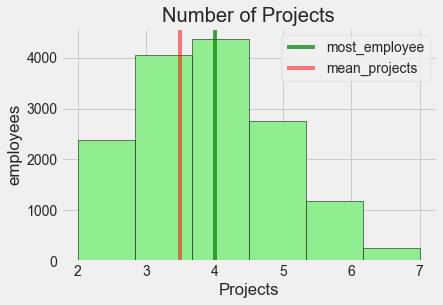

In [122]:
plt.style.use('fivethirtyeight')
plt.hist(np, bins = 6,color = 'lightgreen',edgecolor = 'black')
plt.axvline(4, color = 'green', label = 'most_employee', alpha = 0.7)
plt.axvline(3.5, color = 'red', label = 'mean_projects', alpha = 0.5)
plt.legend()
plt.title('Number of Projects')
plt.xlabel('Projects')
plt.ylabel('employees')

<AxesSubplot:xlabel='salary', ylabel='count'>

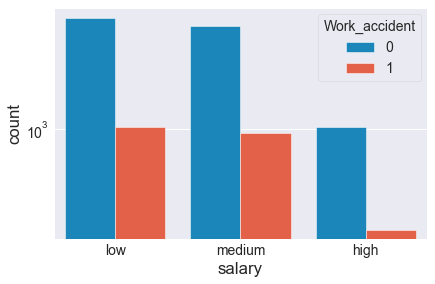

In [125]:
sns.set_style('darkgrid')
sns.countplot(x = df['salary'], hue = df['Work_accident'], log = True)
#we can see here that people with low and medium salary are more prone to work accident

<AxesSubplot:xlabel='count', ylabel='Department'>

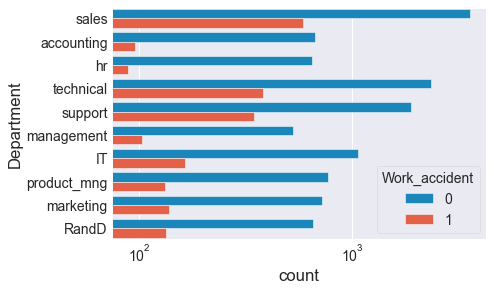

In [126]:
sns.set_style('darkgrid')
sns.countplot(y = df['Department'], hue = df['Work_accident'], log = True)
#we see people in sales have more work accidents, than management with the least accident

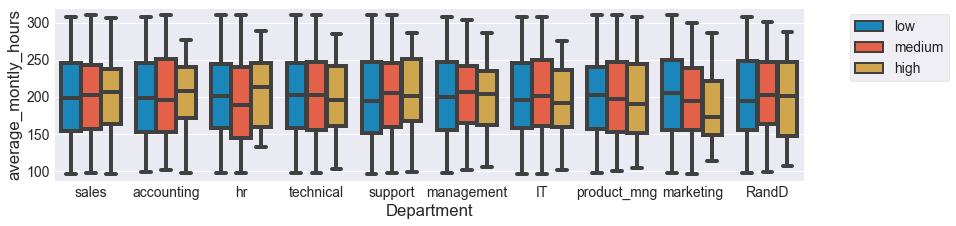

In [147]:
plt.figure(figsize = (12,3))
sns.boxplot(y = 'average_montly_hours', x= 'Department', data = df, hue = 'salary')
plt.legend(bbox_to_anchor = (1.05,1))
#here we can see that sales which had the highest number of people who left also has the highest number 
#of low salary earners working more hours

In [152]:
corr_matrix = df1.corr()

In [153]:
corr_matrix['left'].sort_values(ascending = False)
#we see here that the last 3 variables does not really influence people who stayed or left, to be sure let us use a heat map

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

<AxesSubplot:>

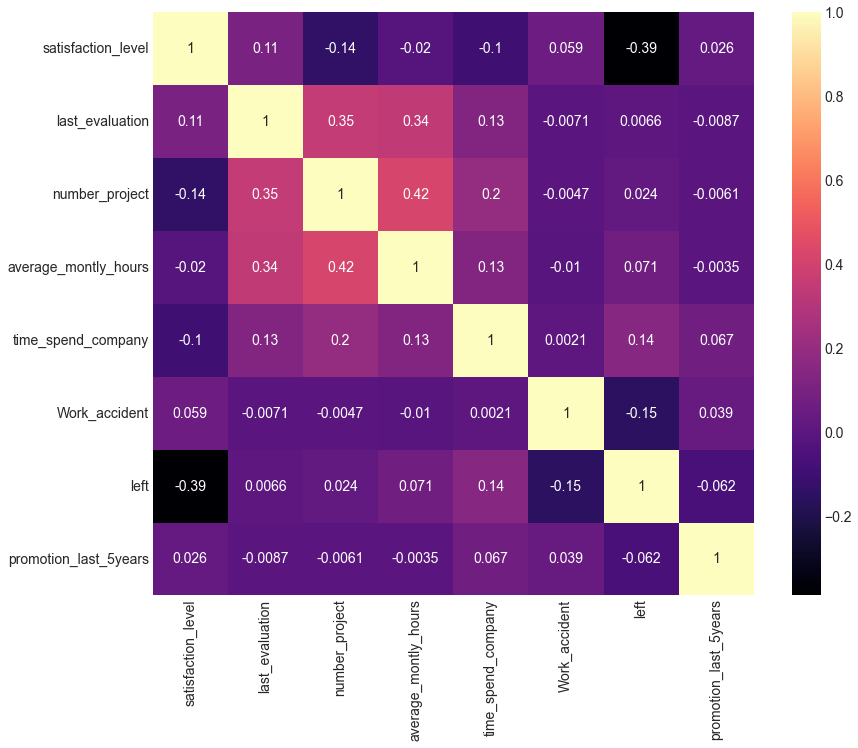

In [157]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot = True, cmap = 'magma')
#now we are sure that the work_accident, satisfaction level and promotion in five years does not really influence people in left
#columns

In [160]:
#Dropping irrelevant columns
df2 =  df1.drop(['satisfaction_level', 'Work_accident', 'promotion_last_5years'], axis = 1)
df2.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Department,salary
0,0.53,2,157,3,1,sales,low
1,0.86,5,262,6,1,sales,medium
2,0.88,7,272,4,1,sales,medium
3,0.87,5,223,5,1,sales,low
4,0.52,2,159,3,1,sales,low


In [165]:
X = df2.drop(['left'], axis = 1)
Y = df2['left']

In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state = 42)

In [187]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split

In [189]:
col_trans = make_column_transformer((OneHotEncoder(),['Department','salary']), remainder = 'passthrough')

col_trans.fit_transform(x_train)

array([[  0.,   0.,   0., ...,   7., 250.,   4.],
       [  0.,   0.,   0., ...,   4., 154.,   3.],
       [  0.,   0.,   0., ...,   2., 154.,   3.],
       ...,
       [  0.,   0.,   0., ...,   5., 249.,   2.],
       [  0.,   0.,   0., ...,   4., 218.,   5.],
       [  0.,   0.,   0., ...,   2., 219.,   4.]])

In [224]:
#Using sgd classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter = 20000, penalty = 'l1', eta0 = 0.1)

In [225]:
pipe = make_pipeline(col_trans, sgd_clf)

cross_val_score(pipe,x_train, y_train, cv=3, scoring = 'accuracy').mean()
#we see that this model performs poorly

0.563965867798963

In [228]:
#Using Logistic Classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 1000, penalty = 'l2', solver = 'lbfgs')

pipe = make_pipeline(col_trans, log_reg)

cross_val_score(pipe,x_train, y_train, cv=3, scoring = 'accuracy').mean()
#we see that this model performs better

0.7462614080213394

In [231]:
#using confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(pipe, x_train, y_train, cv=3)

In [235]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm
#we see 7829 people were correctly classified as retained while 171 were wrongly classified as retained by our model
#we also see 2493 people were wrongly classifed as left while 6 were correctly classified as left.

array([[7829,  171],
       [2493,    6]], dtype=int64)

Text(0.5, -6.38000000000001, 'Truth')

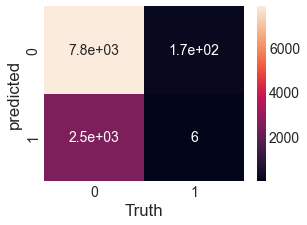

In [236]:
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True)
plt.ylabel('predicted')
plt.xlabel('Truth')

In [243]:
y_scores = cross_val_predict(pipe, x_train, y_train, cv=3,
                             method="decision_function")

In [244]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [246]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)
#since our roc score is low, we would want to consider other models

0.6812863395358144

In [263]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier()

pipe = make_pipeline(col_trans, tree_class)
cross_val_score(pipe , x_train,y_train, cv = 3, scoring = 'accuracy').mean()
#Good we have an almost perfect score.

0.9662823663903973

In [266]:
y_train_pred = cross_val_predict(pipe , x_train,y_train, cv = 3)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[7790,  210],
       [ 157, 2342]], dtype=int64)

In [267]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Department', 'salary'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [269]:
pipe.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [270]:
pipe.score(x_test, y_test)
#it works wonderfully on our test model

0.9635555555555556

In [271]:
test = pipe.predict(x_test)

In [273]:
x_test['left'] = test

In [274]:
x_test
#we get an predicted dataframe on our test model

,last_evaluation,number_project,average_montly_hours,time_spend_company,Department,salary,left
6723,0.96,5,226,2,marketing,medium,0
6473,0.80,3,166,2,IT,low,0
4679,0.98,3,214,2,sales,low,0
862,0.47,2,154,3,sales,low,1
7286,0.76,5,254,2,hr,low,0
...,...,...,...,...,...,...,...
13388,0.81,4,260,3,product_mng,medium,0
10463,0.43,2,249,3,marketing,low,0
5331,0.53,3,156,3,product_mng,low,0
7499,0.58,5,238,2,sales,medium,0


In [275]:
x_test['ori test'] = y_test

In [277]:
x_test.head(20)
#when we compared our predicted left and original test we see it did quite well, like looking at a mirror

,last_evaluation,number_project,average_montly_hours,time_spend_company,Department,salary,left,ori test
6723,0.96,5,226,2,marketing,medium,0,0
6473,0.80,3,166,2,IT,low,0,0
4679,0.98,3,214,2,sales,low,0,0
862,0.47,2,154,3,sales,low,1,1
7286,0.76,5,254,2,hr,low,0,0
8127,0.88,3,224,3,technical,low,0,0
3017,0.78,4,155,3,technical,low,0,0
3087,0.76,4,280,5,hr,low,0,0
6425,0.98,4,166,4,sales,medium,0,0
2250,0.90,5,258,3,technical,medium,0,0
